## Figure 8 (Journal of Climate submission; Molina et al.)

Fig. 8. Spectral analysis conducted per pixel on monthly SSTs ($^{\circ}$C) for the same time periods as in Fig. 7. The dominant frequency (i.e. frequency of peak variance) for the CESM1 control (a), OISSTs (b), and the difference in dominant frequency between the sensitivity experiments and the CESM1 control (c-g) are shown. The Nino 3.4 region is indicated with a polygon. Light blue contours contain locations where sea ice was present at any point during the respective simulations.

**Figure by: Maria J. Molina, NCAR**

In [1]:
# imports 
import xarray as xr
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from climatico.util import weighted_mean, pacific_lon
import matplotlib.patches as mpatches
import cartopy.feature as cfeature
from shapely.geometry.polygon import Polygon
import matplotlib as mpl
import matplotlib.colors as colorss
from datetime import timedelta

In [2]:
from config import directory_figs, directory_data

In [3]:
%%capture

# SSTs
file_g02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.SST.*.nc'
file_g04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG04Sv.pop.h.SST.*.nc'
file_p02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP02Sv.pop.h.SST.*.nc'
file_p04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP04Sv.pop.h.SST.*.nc'
file_psalt = 'b1d.e11.B1850LENS.f09_g16.FWPaSalP04Sv.pop.h.SST.*.nc'
file_cntrl = 'b1d.e11.B1850C5CN.f09_g16.005.pop.h.SST.*.nc'
file_oisst = f'/gpfs/fs1/collections/rda/data/ds277.7/avhrr_v2.1/*/oisst-avhrr-v02r01.*.nc'

ds_g02sv = xr.open_mfdataset(f'{directory_data}{file_g02sv}', combine='by_coords')
ds_g02sv = ds_g02sv.assign_coords(time=ds_g02sv.coords['time'] - timedelta(days=17))
seaice_g02sv = xr.where(ds_g02sv.isel(z_t=0)['SST'].min('time')<=-1.8,1,0).values

ds_g04sv = xr.open_mfdataset(f'{directory_data}{file_g04sv}', combine='by_coords')
ds_g04sv = ds_g04sv.assign_coords(time=ds_g04sv.coords['time'] - timedelta(days=17))
seaice_g04sv = xr.where(ds_g04sv.isel(z_t=0)['SST'].min('time')<=-1.8,1,0).values

ds_p02sv = xr.open_mfdataset(f'{directory_data}{file_p02sv}', combine='by_coords')
ds_p02sv = ds_p02sv.assign_coords(time=ds_p02sv.coords['time'] - timedelta(days=17))
seaice_p02sv = xr.where(ds_p02sv.isel(z_t=0)['SST'].min('time')<=-1.8,1,0).values

ds_p04sv = xr.open_mfdataset(f'{directory_data}{file_p04sv}', combine='by_coords')
ds_p04sv = ds_p04sv.assign_coords(time=ds_p04sv.coords['time'] - timedelta(days=17))
seaice_p04sv = xr.where(ds_p04sv.isel(z_t=0)['SST'].min('time')<=-1.8,1,0).values

ds_psalt = xr.open_mfdataset(f'{directory_data}{file_psalt}', combine='by_coords')
ds_psalt = ds_psalt.assign_coords(time=ds_psalt.coords['time'] - timedelta(days=17))
seaice_psalt = xr.where(ds_psalt.isel(z_t=0)['SST'].min('time')<=-1.8,1,0).values

ds_cntrl = xr.open_mfdataset(f'{directory_data}{file_cntrl}', combine='by_coords')
ds_cntrl = ds_cntrl.assign_coords(time=ds_cntrl.coords['time'] - timedelta(days=17))
seaice_cntrl = xr.where(ds_cntrl.isel(z_t=0)['SST'].min('time')<=-1.8,1,0).values

ds = xr.open_mfdataset(f'{file_oisst}', combine='by_coords')
seaice_oisst = xr.where(ds.isel(zlev=0)['sst'].min('time')<=-1.8,1,0).values

In [4]:
def open_and_assemble(filename, year1, year2):
    """
    Open and assemble the spatially chunked spectral data.
    
    """
    ds1  = xr.open_dataset(f'{directory_data}specx_glbl1_{filename}_{year1}_{year2}.nc')
    ds1  = ds1.assign(spec_xy=(['lat','lon','frq'], ds1['specx'].values.reshape(ds1['lat'].shape[0], ds1['lon'].shape[0], ds1['frq'].shape[0])))

    ds2  = xr.open_dataset(f'{directory_data}specx_glbl2_{filename}_{year1}_{year2}.nc')
    ds2  = ds2.assign(spec_xy=(['lat','lon','frq'], ds2['specx'].values.reshape(ds2['lat'].shape[0], ds2['lon'].shape[0], ds2['frq'].shape[0])))

    ds3  = xr.open_dataset(f'{directory_data}specx_glbl3_{filename}_{year1}_{year2}.nc')
    ds3  = ds3.assign(spec_xy=(['lat','lon','frq'], ds3['specx'].values.reshape(ds3['lat'].shape[0], ds3['lon'].shape[0], ds3['frq'].shape[0])))

    ds4  = xr.open_dataset(f'{directory_data}specx_glbl4_{filename}_{year1}_{year2}.nc')
    ds4  = ds4.assign(spec_xy=(['lat','lon','frq'], ds4['specx'].values.reshape(ds4['lat'].shape[0], ds4['lon'].shape[0], ds4['frq'].shape[0])))

    ds5  = xr.open_dataset(f'{directory_data}specx_glbl5_{filename}_{year1}_{year2}.nc')
    ds5  = ds5.assign(spec_xy=(['lat','lon','frq'], ds5['specx'].values.reshape(ds5['lat'].shape[0], ds5['lon'].shape[0], ds5['frq'].shape[0])))

    ds6  = xr.open_dataset(f'{directory_data}specx_glbl6_{filename}_{year1}_{year2}.nc')
    ds6  = ds6.assign(spec_xy=(['lat','lon','frq'], ds6['specx'].values.reshape(ds6['lat'].shape[0], ds6['lon'].shape[0], ds6['frq'].shape[0])))

    ds7  = xr.open_dataset(f'{directory_data}specx_glbl7_{filename}_{year1}_{year2}.nc')
    ds7  = ds7.assign(spec_xy=(['lat','lon','frq'], ds7['specx'].values.reshape(ds7['lat'].shape[0], ds7['lon'].shape[0], ds7['frq'].shape[0])))

    ds8  = xr.open_dataset(f'{directory_data}specx_glbl8_{filename}_{year1}_{year2}.nc')
    ds8  = ds8.assign(spec_xy=(['lat','lon','frq'], ds8['specx'].values.reshape(ds8['lat'].shape[0], ds8['lon'].shape[0], ds8['frq'].shape[0])))

    ds9  = xr.open_dataset(f'{directory_data}specx_glbl9_{filename}_{year1}_{year2}.nc')
    ds9  = ds9.assign(spec_xy=(['lat','lon','frq'], ds9['specx'].values.reshape(ds9['lat'].shape[0], ds9['lon'].shape[0], ds9['frq'].shape[0])))

    ds10 = xr.open_dataset(f'{directory_data}specx_glbl10_{filename}_{year1}_{year2}.nc')
    ds10  = ds10.assign(spec_xy=(['lat','lon','frq'], ds10['specx'].values.reshape(ds10['lat'].shape[0], ds10['lon'].shape[0], ds10['frq'].shape[0])))

    ds11 = xr.open_dataset(f'{directory_data}specx_glbl11_{filename}_{year1}_{year2}.nc')
    ds11  = ds11.assign(spec_xy=(['lat','lon','frq'], ds11['specx'].values.reshape(ds11['lat'].shape[0], ds11['lon'].shape[0], ds11['frq'].shape[0])))

    ds12 = xr.open_dataset(f'{directory_data}specx_glbl12_{filename}_{year1}_{year2}.nc')
    ds12  = ds12.assign(spec_xy=(['lat','lon','frq'], ds12['specx'].values.reshape(ds12['lat'].shape[0], ds12['lon'].shape[0], ds12['frq'].shape[0])))

    ds13  = xr.open_dataset(f'{directory_data}specx_glbl13_{filename}_{year1}_{year2}.nc')
    ds13  = ds13.assign(spec_xy=(['lat','lon','frq'], ds13['specx'].values.reshape(ds13['lat'].shape[0], ds13['lon'].shape[0], ds13['frq'].shape[0])))

    ds14  = xr.open_dataset(f'{directory_data}specx_glbl14_{filename}_{year1}_{year2}.nc')
    ds14  = ds14.assign(spec_xy=(['lat','lon','frq'], ds14['specx'].values.reshape(ds14['lat'].shape[0], ds14['lon'].shape[0], ds14['frq'].shape[0])))

    ds15  = xr.open_dataset(f'{directory_data}specx_glbl15_{filename}_{year1}_{year2}.nc')
    ds15  = ds15.assign(spec_xy=(['lat','lon','frq'], ds15['specx'].values.reshape(ds15['lat'].shape[0], ds15['lon'].shape[0], ds15['frq'].shape[0])))

    ds16 = xr.open_dataset(f'{directory_data}specx_glbl16_{filename}_{year1}_{year2}.nc')
    ds16  = ds16.assign(spec_xy=(['lat','lon','frq'], ds16['specx'].values.reshape(ds16['lat'].shape[0], ds16['lon'].shape[0], ds16['frq'].shape[0])))

    ds17  = xr.open_dataset(f'{directory_data}specx_glbl17_{filename}_{year1}_{year2}.nc')
    ds17  = ds17.assign(spec_xy=(['lat','lon','frq'], ds17['specx'].values.reshape(ds17['lat'].shape[0], ds17['lon'].shape[0], ds17['frq'].shape[0])))

    ds18 = xr.open_dataset(f'{directory_data}specx_glbl18_{filename}_{year1}_{year2}.nc')
    ds18  = ds18.assign(spec_xy=(['lat','lon','frq'], ds18['specx'].values.reshape(ds18['lat'].shape[0], ds18['lon'].shape[0], ds18['frq'].shape[0])))

    grid_combine = [
                    [ds1['spec_xy'],ds2['spec_xy'],ds3['spec_xy'],ds4['spec_xy'],ds5['spec_xy'],ds6['spec_xy']],
                    [ds7['spec_xy'],ds8['spec_xy'],ds9['spec_xy'],ds10['spec_xy'],ds11['spec_xy'],ds12['spec_xy']],
                    [ds13['spec_xy'],ds14['spec_xy'],ds15['spec_xy'],ds16['spec_xy'],ds17['spec_xy'],ds18['spec_xy']],
                   ]

    combine_ds = xr.combine_nested(grid_combine, concat_dim=['lat', 'lon'])   

    return combine_ds

def open_and_assemble_oisst(filename, year1, year2):
    """
    Open and assemble the spatially chunked spectral data.
    
    """
    ds1  = xr.open_dataset(f'{directory_data}specx_glbl1_{filename}_{year1}_{year2}.nc')
    ds1  = ds1.assign(spec_xy=(['lat','lon','frq'], ds1['specx'].values.reshape(ds1['lat'].shape[0], ds1['lon'].shape[0], ds1['frq'].shape[0])))

    ds2  = xr.open_dataset(f'{directory_data}specx_glbl2_{filename}_{year1}_{year2}.nc')
    ds2  = ds2.assign(spec_xy=(['lat','lon','frq'], ds2['specx'].values.reshape(ds2['lat'].shape[0], ds2['lon'].shape[0], ds2['frq'].shape[0])))

    ds3  = xr.open_dataset(f'{directory_data}specx_glbl3_{filename}_{year1}_{year2}.nc')
    ds3  = ds3.assign(spec_xy=(['lat','lon','frq'], ds3['specx'].values.reshape(ds3['lat'].shape[0], ds3['lon'].shape[0], ds3['frq'].shape[0])))

    ds4  = xr.open_dataset(f'{directory_data}specx_glbl4_{filename}_{year1}_{year2}.nc')
    ds4  = ds4.assign(spec_xy=(['lat','lon','frq'], ds4['specx'].values.reshape(ds4['lat'].shape[0], ds4['lon'].shape[0], ds4['frq'].shape[0])))

    ds5  = xr.open_dataset(f'{directory_data}specx_glbl5_{filename}_{year1}_{year2}.nc')
    ds5  = ds5.assign(spec_xy=(['lat','lon','frq'], ds5['specx'].values.reshape(ds5['lat'].shape[0], ds5['lon'].shape[0], ds5['frq'].shape[0])))

    ds6  = xr.open_dataset(f'{directory_data}specx_glbl6_{filename}_{year1}_{year2}.nc')
    ds6  = ds6.assign(spec_xy=(['lat','lon','frq'], ds6['specx'].values.reshape(ds6['lat'].shape[0], ds6['lon'].shape[0], ds6['frq'].shape[0])))

    ds7  = xr.open_dataset(f'{directory_data}specx_glbl7_{filename}_{year1}_{year2}.nc')
    ds7  = ds7.assign(spec_xy=(['lat','lon','frq'], ds7['specx'].values.reshape(ds7['lat'].shape[0], ds7['lon'].shape[0], ds7['frq'].shape[0])))

    ds8  = xr.open_dataset(f'{directory_data}specx_glbl8_{filename}_{year1}_{year2}.nc')
    ds8  = ds8.assign(spec_xy=(['lat','lon','frq'], ds8['specx'].values.reshape(ds8['lat'].shape[0], ds8['lon'].shape[0], ds8['frq'].shape[0])))

    ds9  = xr.open_dataset(f'{directory_data}specx_glbl9_{filename}_{year1}_{year2}.nc')
    ds9  = ds9.assign(spec_xy=(['lat','lon','frq'], ds9['specx'].values.reshape(ds9['lat'].shape[0], ds9['lon'].shape[0], ds9['frq'].shape[0])))

    ds10  = xr.open_dataset(f'{directory_data}specx_glbl10_{filename}_{year1}_{year2}.nc')
    ds10  = ds10.assign(spec_xy=(['lat','lon','frq'], ds10['specx'].values.reshape(ds10['lat'].shape[0], ds10['lon'].shape[0], ds10['frq'].shape[0])))

    ds100 = xr.open_dataset(f'{directory_data}specx_glbl100_{filename}_{year1}_{year2}.nc')
    ds100 = ds100.assign(spec_xy=(['lat','lon','frq'], ds100['specx'].values.reshape(ds100['lat'].shape[0], ds100['lon'].shape[0], ds100['frq'].shape[0])))

    ds_10 = xr.concat([ds10,ds100], dim="lat")

    ds11  = xr.open_dataset(f'{directory_data}specx_glbl11_{filename}_{year1}_{year2}.nc')
    ds11  = ds11.assign(spec_xy=(['lat','lon','frq'], ds11['specx'].values.reshape(ds11['lat'].shape[0], ds11['lon'].shape[0], ds11['frq'].shape[0])))

    ds12  = xr.open_dataset(f'{directory_data}specx_glbl12_{filename}_{year1}_{year2}.nc')
    ds12  = ds12.assign(spec_xy=(['lat','lon','frq'], ds12['specx'].values.reshape(ds12['lat'].shape[0], ds12['lon'].shape[0], ds12['frq'].shape[0])))

    ds13  = xr.open_dataset(f'{directory_data}specx_glbl13_{filename}_{year1}_{year2}.nc')
    ds13  = ds13.assign(spec_xy=(['lat','lon','frq'], ds13['specx'].values.reshape(ds13['lat'].shape[0], ds13['lon'].shape[0], ds13['frq'].shape[0])))

    ds14  = xr.open_dataset(f'{directory_data}specx_glbl14_{filename}_{year1}_{year2}.nc')
    ds14  = ds14.assign(spec_xy=(['lat','lon','frq'], ds14['specx'].values.reshape(ds14['lat'].shape[0], ds14['lon'].shape[0], ds14['frq'].shape[0])))

    ds15  = xr.open_dataset(f'{directory_data}specx_glbl15_{filename}_{year1}_{year2}.nc')
    ds15  = ds15.assign(spec_xy=(['lat','lon','frq'], ds15['specx'].values.reshape(ds15['lat'].shape[0], ds15['lon'].shape[0], ds15['frq'].shape[0])))

    ds16 = xr.open_dataset(f'{directory_data}specx_glbl16_{filename}_{year1}_{year2}.nc')
    ds16  = ds16.assign(spec_xy=(['lat','lon','frq'], ds16['specx'].values.reshape(ds16['lat'].shape[0], ds16['lon'].shape[0], ds16['frq'].shape[0])))

    ds17  = xr.open_dataset(f'{directory_data}specx_glbl17_{filename}_{year1}_{year2}.nc')
    ds17  = ds17.assign(spec_xy=(['lat','lon','frq'], ds17['specx'].values.reshape(ds17['lat'].shape[0], ds17['lon'].shape[0], ds17['frq'].shape[0])))

    ds18  = xr.open_dataset(f'{directory_data}specx_glbl18_{filename}_{year1}_{year2}.nc')
    ds18  = ds18.assign(spec_xy=(['lat','lon','frq'], ds18['specx'].values.reshape(ds18['lat'].shape[0], ds18['lon'].shape[0], ds18['frq'].shape[0])))

    grid_combine = [
                    [ds1['spec_xy'], ds2['spec_xy'], ds3['spec_xy'], ds4['spec_xy'],  ds5['spec_xy'], ds6['spec_xy']],
                    [ds7['spec_xy'], ds8['spec_xy'], ds9['spec_xy'], ds_10['spec_xy'],ds11['spec_xy'],ds12['spec_xy']],
                    [ds13['spec_xy'],ds14['spec_xy'],ds15['spec_xy'],ds16['spec_xy'], ds17['spec_xy'],ds18['spec_xy']],
                   ]

    combine_ds = xr.combine_nested(grid_combine, concat_dim=['lat', 'lon'])   

    return combine_ds

def frequency_of_maxvariance(combine_ds):
    """
    Helper function to generate array containing the frequency of maximum variance per pixel.
    
    """
    arg_max_array = np.argmax(combine_ds.values, axis=2)
    temp = np.zeros(arg_max_array.shape)
    
    for i, j in product(np.arange(0,arg_max_array.shape[0]),np.arange(0,arg_max_array.shape[1])):
        temp[i,j] = combine_ds['frq'].values[arg_max_array[i,j]]
        
    return temp

In [5]:
year1 = 201
year2 = 500

filename = 'FWAtSalG02Sv'
ds_FWAtSalG02Sv = open_and_assemble(filename, year1, year2)
# frequency of maximum variance
freq_FWAtSalG02Sv = frequency_of_maxvariance(ds_FWAtSalG02Sv)

filename = 'FWAtSalG04Sv'
ds_FWAtSalG04Sv = open_and_assemble(filename, year1, year2)
# frequency of maximum variance
freq_FWAtSalG04Sv = frequency_of_maxvariance(ds_FWAtSalG04Sv)

filename = 'FWAtSalP02Sv'
ds_FWAtSalP02Sv = open_and_assemble(filename, year1, year2)
# frequency of maximum variance
freq_FWAtSalP02Sv = frequency_of_maxvariance(ds_FWAtSalP02Sv)

filename = 'FWAtSalP04Sv'
ds_FWAtSalP04Sv = open_and_assemble(filename, year1, year2)
# frequency of maximum variance
freq_FWAtSalP04Sv = frequency_of_maxvariance(ds_FWAtSalP04Sv)

year1 = 101
year2 = 250

filename = 'FWPaSalP04Sv'
ds_FWPaSalP04Sv = open_and_assemble(filename, year1, year2)
# frequency of maximum variance
freq_FWPaSalP04Sv = frequency_of_maxvariance(ds_FWPaSalP04Sv)

year1 = 1001
year2 = 1300

filename = '005'
ds_005 = open_and_assemble(filename, year1, year2)
# frequency of maximum variance
freq_005 = frequency_of_maxvariance(ds_005)

year1 = 1982
year2 = 2020

filename = 'nc'
ds_oisst = open_and_assemble_oisst(filename, year1, year2)
# frequency of maximum variance
freq_oisst = frequency_of_maxvariance(ds_oisst)

/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1366: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


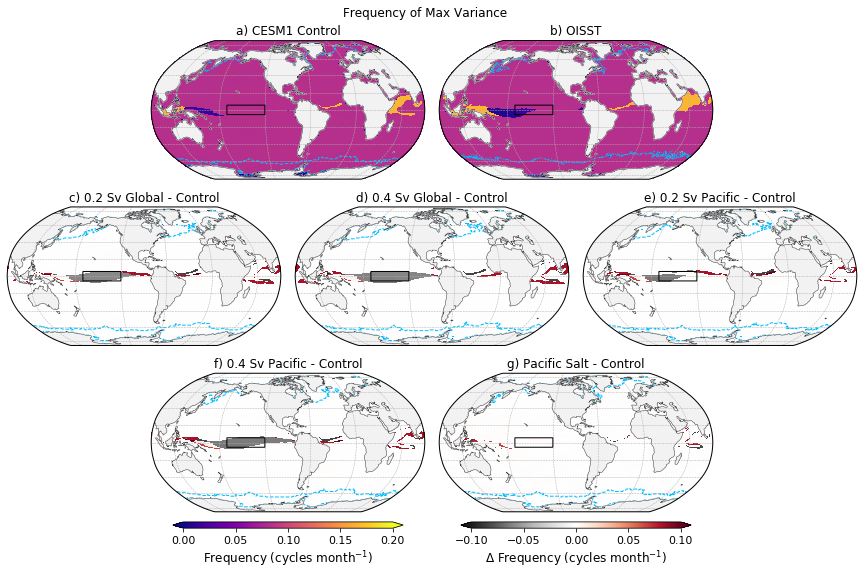

In [6]:
# --------------

a = u"\u00b0"
vanom1=-0.1
vanom2=0.1

fig = plt.figure(figsize=(8,7))

fig.suptitle('Frequency of Max Variance', fontsize=12, x=0.475, y=1.03)

# --------------

ax1 = plt.axes([0., 0.66, 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax1.set_title('a) CESM1 Control', fontsize=12)

data, lons = add_cyclic_point(freq_005, coord=ds_005['lon'])
ax1.pcolormesh(lons, ds_005['lat'], data, cmap='plasma', vmin=0, vmax=0.2, transform=ccrs.PlateCarree())

iceline, _ = add_cyclic_point(seaice_cntrl, coord=ds_005['lon'])
ax1.contour(lons, ds_005['lat'], iceline.data, colors='deepskyblue', 
            levels=[0,1], linewidths=1., linestyles='dashed', transform=ccrs.PlateCarree())

ax1.coastlines(resolution='110m', color='0.25', linewidth=0.5, zorder=15)
ax1.add_feature(cartopy.feature.LAND, facecolor='0.95', zorder=10)
ax1.gridlines(linestyle='--', linewidth=0.5, zorder=15)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor='grey', lw=1, transform=ccrs.PlateCarree(), zorder=30)
ax1.add_patch(poly)

ax1.outline_patch.set_zorder(100)

# --------------

ax2 = plt.axes([0.5, 0.66, 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax2.set_title('b) OISST', fontsize=12)

data, lons = add_cyclic_point(freq_oisst, coord=ds_oisst['lon'])
cs1 = ax2.pcolormesh(lons, ds_oisst['lat'], data, cmap='plasma', vmin=0, vmax=0.2, transform=ccrs.PlateCarree())

iceline, _ = add_cyclic_point(seaice_oisst, coord=ds_oisst['lon'])
ax2.contour(lons, ds_oisst['lat'], iceline.data, colors='deepskyblue', 
            levels=[0,1], linewidths=0.5, linestyles='dashed', transform=ccrs.PlateCarree())

ax2.coastlines(resolution='110m', color='0.25', linewidth=0.5, zorder=15)
ax2.add_feature(cartopy.feature.LAND, facecolor='0.95', zorder=10)
ax2.gridlines(linestyle='--', linewidth=0.5, zorder=15)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor='grey', lw=1, transform=ccrs.PlateCarree(), zorder=30)
ax2.add_patch(poly)

ax2.outline_patch.set_zorder(100)

# --------------

ax3 = plt.axes([-0.25, 0.33, 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax3.set_title('c) 0.2 Sv Global - Control', fontsize=12)

data, lons = add_cyclic_point(freq_FWAtSalG02Sv - freq_005, coord=ds_FWAtSalG02Sv['lon'])
cs2 = ax3.pcolormesh(lons, ds_FWAtSalG02Sv['lat'], data, cmap='RdGy_r', vmin=vanom1, vmax=vanom2, transform=ccrs.PlateCarree())

iceline, _ = add_cyclic_point(seaice_g02sv, coord=ds_g02sv['lon'])
ax3.contour(lons, ds_g02sv['lat'], iceline.data, colors='deepskyblue', 
            levels=[0,1], linewidths=1., linestyles='dashed', transform=ccrs.PlateCarree())

ax3.coastlines(resolution='110m', color='0.25', linewidth=0.5, zorder=15)
ax3.add_feature(cartopy.feature.LAND, facecolor='0.95', zorder=10)
ax3.gridlines(linestyle='--', linewidth=0.5, zorder=15)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor='grey', lw=1, transform=ccrs.PlateCarree(), zorder=30)
ax3.add_patch(poly)

ax3.outline_patch.set_zorder(100)

# --------------

ax4 = plt.axes([0.25, 0.33, 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax4.set_title('d) 0.4 Sv Global - Control', fontsize=12)

data, lons = add_cyclic_point(freq_FWAtSalG04Sv - freq_005, coord=ds_FWAtSalG04Sv['lon'])
ax4.pcolormesh(lons, ds_FWAtSalG04Sv['lat'], data, cmap='RdGy_r', vmin=vanom1, vmax=vanom2, transform=ccrs.PlateCarree())

iceline, _ = add_cyclic_point(seaice_g04sv, coord=ds_g04sv['lon'])
ax4.contour(lons, ds_g04sv['lat'], iceline.data, colors='deepskyblue', 
            levels=[0,1], linewidths=1., linestyles='dashed', transform=ccrs.PlateCarree())

ax4.coastlines(resolution='110m', color='0.25', linewidth=0.5, zorder=15)
ax4.add_feature(cartopy.feature.LAND, facecolor='0.95', zorder=10)
ax4.gridlines(linestyle='--', linewidth=0.5, zorder=15)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor='grey', lw=1, transform=ccrs.PlateCarree(), zorder=30)
ax4.add_patch(poly)

ax4.outline_patch.set_zorder(100)

# --------------

ax44 = plt.axes([0.75, 0.33, 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax44.set_title('e) 0.2 Sv Pacific - Control', fontsize=12)

data, lons = add_cyclic_point(freq_FWAtSalP02Sv - freq_005, coord=ds_FWAtSalP02Sv['lon'])
ax44.pcolormesh(lons, ds_FWAtSalP02Sv['lat'], data, cmap='RdGy_r', vmin=vanom1, vmax=vanom2, transform=ccrs.PlateCarree())

iceline, _ = add_cyclic_point(seaice_p02sv, coord=ds_p02sv['lon'])
ax44.contour(lons, ds_p02sv['lat'], iceline.data, colors='deepskyblue', 
            levels=[0,1], linewidths=1., linestyles='dashed', transform=ccrs.PlateCarree())

ax44.coastlines(resolution='110m', color='0.25', linewidth=0.5, zorder=15)
ax44.add_feature(cartopy.feature.LAND, facecolor='0.95', zorder=10)
ax44.gridlines(linestyle='--', linewidth=0.5, zorder=15)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor='grey', lw=1, transform=ccrs.PlateCarree(), zorder=30)
ax44.add_patch(poly)

ax44.outline_patch.set_zorder(100)

# --------------

ax5 = plt.axes([0., 0., 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax5.set_title('f) 0.4 Sv Pacific - Control', fontsize=12)

data, lons = add_cyclic_point(freq_FWAtSalP04Sv - freq_005, coord=ds_FWAtSalP04Sv['lon'])
ax5.pcolormesh(lons, ds_FWAtSalP04Sv['lat'], data, cmap='RdGy_r', vmin=vanom1, vmax=vanom2, transform=ccrs.PlateCarree())

iceline, _ = add_cyclic_point(seaice_p04sv, coord=ds_p04sv['lon'])
ax5.contour(lons, ds_p04sv['lat'], iceline.data, colors='deepskyblue', 
            levels=[0,1], linewidths=1., linestyles='dashed', transform=ccrs.PlateCarree())

ax5.coastlines(resolution='110m', color='0.25', linewidth=0.5, zorder=15)
ax5.add_feature(cartopy.feature.LAND, facecolor='0.95', zorder=10)
ax5.gridlines(linestyle='--', linewidth=0.5, zorder=15)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor='grey', lw=1, transform=ccrs.PlateCarree(), zorder=30)
ax5.add_patch(poly)

ax5.outline_patch.set_zorder(100)

# --------------

ax6 = plt.axes([0.5, 0., 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax6.set_title('g) Pacific Salt - Control', fontsize=12)

data, lons = add_cyclic_point(freq_FWPaSalP04Sv - freq_005, coord=ds_FWPaSalP04Sv['lon'])
ax6.pcolormesh(lons, ds_FWPaSalP04Sv['lat'], data, cmap='RdGy_r', vmin=vanom1, vmax=vanom2, transform=ccrs.PlateCarree())

iceline, _ = add_cyclic_point(seaice_psalt, coord=ds_psalt['lon'])
ax6.contour(lons, ds_psalt['lat'], iceline.data, colors='deepskyblue', 
            levels=[0,1], linewidths=1., linestyles='dashed', transform=ccrs.PlateCarree())

ax6.coastlines(resolution='110m', color='0.25', linewidth=0.5, zorder=15)
ax6.add_feature(cartopy.feature.LAND, facecolor='0.95', zorder=10)
ax6.gridlines(linestyle='--', linewidth=0.5, zorder=15)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor='grey', lw=1, transform=ccrs.PlateCarree(), zorder=30)
ax6.add_patch(poly)

ax6.outline_patch.set_zorder(100)

# -------------- colorbars

cbar_ax = fig.add_axes([0.0375, -0.005, 0.4, 0.0125])
ticks_1 = [0,0.05,0.1,0.15,0.2]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.ax.tick_params(labelsize=11)
cbar.set_label('Frequency (cycles month$^{-1}$)', fontsize=12)

# --------------

cbar_ax = fig.add_axes([0.5375, -0.005, 0.4, 0.0125])
ticks_1 = [-0.1,-0.05,0,0.05,0.1]
cbar = fig.colorbar(cs2, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.ax.tick_params(labelsize=11)
cbar.set_label('\u0394 Frequency (cycles month$^{-1}$)', fontsize=12)

# --------------

plt.savefig(f'{directory_figs}amocenso_fig8.png', bbox_inches='tight', dpi=200)
plt.savefig(f'{directory_figs}amocenso_fig8.pdf', bbox_inches='tight', dpi=500)
plt.show()

# --------------